**Q-3.** Consider the ‘Blood Pressure Before’ and ‘Blood Pressure After’ columns from the
data and calculate the following

link = https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp=share_

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("data.csv")
df.head()

,Patient ID,Blood Pressure Before,Blood Pressure After
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [18]:
df.columns

Index(['Patient ID', 'Blood Pressure Before', 'Blood Pressure After'], dtype='object')

In [20]:
# Extract the 'Blood Pressure Before' and 'Blood Pressure After' columns
bp_before = df["Blood Pressure Before"]
bp_after = df["Blood Pressure After"]

**a. Measure the dispersion in both and interpret the results**

In [22]:
# Calculate the dispersion measures for 'Blood Pressure Before'
range_before = np.max(bp_before) - np.min(bp_before)
variance_before = np.var(bp_before)
std_before = np.std(bp_before)

# Print the results
print("Dispersion Measures for 'Blood Pressure Before':")
print(f"Range: {range_before}")
print(f"Variance: {variance_before:.2f}")
print(f"Standard Deviation: {std_before:.2f}")

Dispersion Measures for 'Blood Pressure Before':
Range: 28
Variance: 43.10
Standard Deviation: 6.57


In [24]:
# Calculate the dispersion measures for 'Blood Pressure Before'
range_after = np.max(bp_after) - np.min(bp_after)
variance_after = np.var(bp_after)
std_after = np.std(bp_after)

# Print the results
print("Dispersion Measures for 'Blood Pressure After':")
print(f"Range: {range_after}")
print(f"Variance: {variance_after:.2f}")
print(f"Standard Deviation: {std_after:.2f}")

Dispersion Measures for 'Blood Pressure After':
Range: 23
Variance: 46.97
Standard Deviation: 6.85


**Interpretation:**

1. Range: The range for bp_before is 28 and bp_after its is 23. This indicates there is moderate spread of values but bp_before has slightly wider range compared to bp_after.
2. Variance: The variance bp_before is 43.10 and bp_after is 46.97 which is relatively low indicating that data points are relatively close to mean.
3. Standard Deviation: The standard deviation for bp_before is 6.57 and its 6.85 for bp_after which is pretty much similar indicating that there is comparable amount of variability in the data.

**b. Calculate mean and 5% confidence interval and plot it in a graph**

In [29]:
# Calculate mean and confidence interval for 'Blood Pressure Before'
mean_before = np.mean(bp_before)
confidence_interval_before = stats.t.interval(0.95, len(bp_before)-1, loc=mean_before, scale=stats.sem(bp_before))

# Print the results
print("Mean and 5% Confidence Interval for 'Blood Pressure Before':")
print(f"Mean: {mean_before}")
print(f"Confidence Interval: {confidence_interval_before}")

Mean and 5% Confidence Interval for 'Blood Pressure Before':
Mean: 133.91
Confidence Interval: (132.60075849172767, 135.21924150827232)


In [30]:
# Calculate mean and confidence interval for 'Blood Pressure After'
mean_after = np.mean(bp_after)
confidence_interval_after = stats.t.interval(0.95, len(bp_after)-1, loc=mean_after, scale=stats.sem(bp_after))

print("Mean and 5% Confidence Interval for 'Blood Pressure After':")
print(f"Mean: {mean_after}")
print(f"Confidence Interval: {confidence_interval_after}")

Mean and 5% Confidence Interval for 'Blood Pressure After':
Mean: 128.36
Confidence Interval: (126.99326697818071, 129.7267330218193)


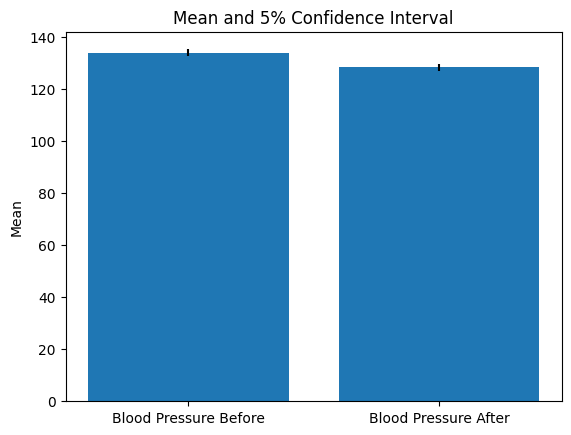

In [31]:
# Plotting the means and confidence intervals
labels = ['Blood Pressure Before', 'Blood Pressure After']
means = [mean_before, mean_after]
confidence_intervals = [confidence_interval_before, confidence_interval_after]

plt.bar(labels, means, yerr=[(ci[1]-ci[0])/2 for ci in confidence_intervals])
plt.ylabel('Mean')
plt.title('Mean and 5% Confidence Interval')
plt.show()

**c. Calculate the Mean absolute deviation and Standard deviation and interpret the results.**

In [34]:
# Calculate the Mean Absolute Deviation (MAD) for 'Blood Pressure Before'
mad_before = np.mean(np.abs(bp_before - np.mean(bp_before)))

# Calculate the Mean Absolute Deviation (MAD) for 'Blood Pressure After'
mad_after = np.mean(np.abs(bp_after - np.mean(bp_after)))

# Print the results
print(f"Mean Absolute Deviation (MAD) for 'Blood Pressure Before': {mad_before}")
print(f"Mean Absolute Deviation (MAD) for 'Blood Pressure After': {mad_after}")
print(f"Standard Deviation for 'Blood Pressure Before': {std_before:.2f}")
print(f"Standard Deviation for 'Blood Pressure After': {std_after:.2f}")

Mean Absolute Deviation (MAD) for 'Blood Pressure Before': 5.7118
Mean Absolute Deviation (MAD) for 'Blood Pressure After': 5.9
Standard Deviation for 'Blood Pressure Before': 6.57
Standard Deviation for 'Blood Pressure After': 6.85


**Interpretaion**

- Both 'Blood Pressure Before' and 'Blood Pressure After' columns exhibit similar levels of variability and dispersion, as indicated by their comparable MAD and standard deviation values.
- The MAD and standard deviation values provide a measure of the average deviation or spread of the data points from the mean.
- The higher the MAD or standard deviation, the greater the dispersion or variability of the data points from the mean, indicating a wider spread of values.
- Conversely, a lower MAD or standard deviation suggests less variability and a narrower range of values around the mean.

**d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.**

In [39]:
# Calculate the correlation coefficient and p-value
correlation, p_value = stats.pearsonr(bp_before, bp_after)

# Print the results
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2f}")

# Check significance at 1% level of significance
if p_value < 0.01:
    print("The correlation coefficient is statistically significant at the 1% level of significance.")
else:
    print("The correlation coefficient is not statistically significant at the 1% level of significance.")

Correlation Coefficient: 0.98
P-value: 0.00
The correlation coefficient is statistically significant at the 1% level of significance.


**Interpretation:**

The correlation coefficient measures the strength and direction of the linear relationship between the 'Blood Pressure Before' and 'Blood Pressure After' variables. A correlation coefficient of **0.98** indicates a **very strong positive linear relationship** between the two variables. This means that as the 'Blood Pressure Before' values increase, the 'Blood Pressure After' values also tend to increase proportionally.

The p-value of **0.00** indicates that the correlation coefficient is statistically significant. Since the p-value is less than 0.01 (1% level of significance), we can conclude that the correlation between 'Blood Pressure Before' and 'Blood Pressure After' is statistically significant. This means that the observed correlation coefficient of 0.98 is unlikely to have occurred by chance alone.